In [1]:
"""
Own_k_mean_iris.ipynb
Author: Petri Lamminaho 
Iris data with own k-mean algorithm 
"""

'\nOwn_k_mean_iris.ipynb\nAuthor: Petri Lamminaho \nIris data with own k-mean algorithm \n'

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
colors = 10*["g","r","c","b","k"]

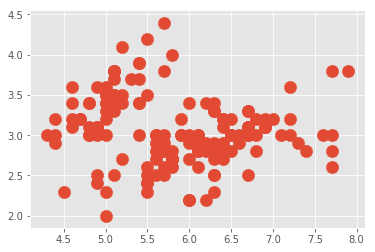

In [4]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [5]:
class K_Mean:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k 
        self.tol = tol
        self.max_iter = max_iter
        self.centroids = {}
        self.classifications = {}
        
    def fit(self, data):
       
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            if optimized:
                break
   
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classifications

Text(0, 0.5, 'Sepal Width')

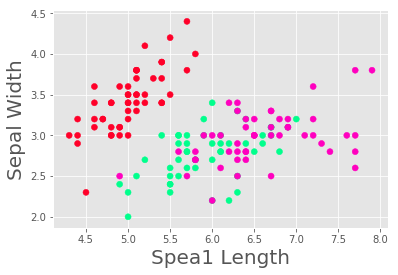

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=20)
plt.ylabel('Sepal Width', fontsize=20)

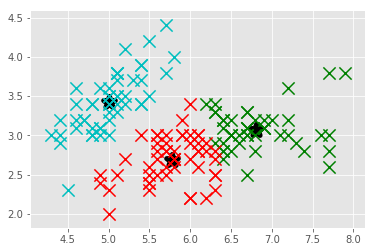

In [7]:
model = K_Mean(3)
model.fit(X)
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="*", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()